<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Theory" data-toc-modified-id="Theory-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Theory</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Helper functions</a></span><ul class="toc-item"><li><span><a href="#Finite-diference-solver" data-toc-modified-id="Finite-diference-solver-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Finite diference solver</a></span></li></ul></li><li><span><a href="#Optical-simulations" data-toc-modified-id="Optical-simulations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Optical simulations</a></span><ul class="toc-item"><li><span><a href="#Optical-generation-profile" data-toc-modified-id="Optical-generation-profile-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Optical generation profile</a></span></li><li><span><a href="#Outcoupling-of-CBP:Ir(ppy)3-device" data-toc-modified-id="Outcoupling-of-CBP:Ir(ppy)3-device-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Outcoupling of CBP:Ir(ppy)3 device</a></span></li><li><span><a href="#TPBi:Ir(ppy)3-heated-devices" data-toc-modified-id="TPBi:Ir(ppy)3-heated-devices-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>TPBi:Ir(ppy)3 heated devices</a></span></li><li><span><a href="#$d_{ETL}$-dependent-Optical-generation-in-heated-devices" data-toc-modified-id="$d_{ETL}$-dependent-Optical-generation-in-heated-devices-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>$d_{ETL}$-dependent Optical generation in heated devices</a></span></li></ul></li><li><span><a href="#Feasible-parameter-regions" data-toc-modified-id="Feasible-parameter-regions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feasible parameter regions</a></span></li><li><span><a href="#Temperature-data" data-toc-modified-id="Temperature-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Temperature data</a></span></li></ul></div>

This notebook contains the exciton quenching simulations supporting our [publication](http://advances.sciencemag.org/cgi/content/full/6/32/eabb2659) on spontaneous orientation polarization-induced quenching in organic light-emitting devices. If you find this code useful, please cite our publication:

>J. S. Bangsund, J. R. Van Sambeek, N. M. Concannon, R. J. Holmes, Sub–turn-on exciton quenching due to molecular orientation and polarization in organic light-emitting devices. Sci. Adv. 6, eabb2659 (2020).

# Theory

We model the steady-state triplet exciton density, $n_T$, near device turn-on (~2.5 V), allowing for diffusion and triplet-polaron quenching with holes accumulated due to SOP. At this bias, the hole density should mostly reflect the SOP-induced population and the electrically generated exciton density is small enough to neglect exciton-exciton annihilation processes. The rate equation for $n_T$ in these conditions is:

$$\begin{equation} 
\frac{dn_T}{dt} = G + D\frac{\partial^2n_T}{\partial x^2} 
                  - n_T \Big( \frac{1}{\tau} + k_{TP}n_h \Big)
\end{equation}$$

where x is the out-of-plane spatial coordinate, $D$ is the triplet exciton diffusivity, $\tau$ is the cavity-modified exciton lifetime, $k_{TP}$ is the triplet-polaron quenching rate constant, $n_h$ is the SOP-induced hole density, and $G$ is the exciton generation rate. It is commonly assumed that SOP-induced holes are concentrated within a few nanometers of the polar layer. For simplicity, we assume $n_h$ decays exponentially with width $w$ from the EML/ETL interface in CBP:Ir(ppy)$_3$ devices (see Fig. 1A of our [publication](http://advances.sciencemag.org/cgi/content/full/6/32/eabb2659)). The magnitude of $n_h$ is set by the hole density measured using DCM assuming holes only accumulate within the emissive layer. $n_h$ is then calculated with coordinates in the appropriate reference frame (based on exponential decay from either the HTL/EML interface or the EML/ETL interface) as:

$$\begin{equation}
n_h = \sigma_h \frac{e^{-x/w}}{\int_{0}^{d_{EML}} e^{-x/w} dx}
\end{equation}$$

where $\sigma_h$ is the measured hole sheet density (from displacement current measurements) and $d_{EML}$ is the emissive layer (EML) thickness. When simulating PL, $G$ is calculated using the transfer matrix formalism. Under electrical excitation, we assume that $G$ (i.e. the recombination zone) has the same functional form as $n_h$, as the recombination probability will be highest where the hole density is large. The rate equation for $n_T$ is then solved numerically, applying reflecting boundary conditions ($dn_T/dt = 0$) at each interface of the emissive layer. The normalized PL can then be calculated by dividing the outcoupled photon flux when holes are present (at the turn-on voltage, $V = 2.5$), by the outcoupled photon flux when no holes are accumulated in the device (at $V = -3$):

$$\begin{equation} 
PL_{norm} = \frac{PL(V=2.5)}{PL(V=-3)} 
          = \frac{\int \eta_{OC} k_r n_T(n_h) dx}{\int \eta_{OC} k_r n_T(n_h=0) dx}
\end{equation}$$

where $k_r$ is the cavity-modified radiative decay rate and $\eta_{OC}$ is the outcoupling efficiency, both integrated over the PL spectrum of Ir(ppy)$_3$ and calculated using a classical dipole emission model assuming isotropic dipole orientation. In calculating EQE, we assume that both charge balance and the spin fraction are unity, which is supported by the results in Fig. 1D of our [publication](http://advances.sciencemag.org/cgi/content/full/6/32/eabb2659). In other words, every injected charge forms an exciton which can decay radiatively. EQE is then simply equal to the outcoupled photon flux divided by the exciton generation rate. This is equivalent to the outcoupled radiative decay rate divided by the total decay rate:

$$\begin{equation} 
\begin{split}
EQE & = \frac{\int \eta_{OC} k_r n_T dx}{\int \Big(G + D\frac{\partial^2n_T}{\partial x^2}\Big) dx}   = \frac{\int \eta_{OC} k_r \tau^* \Big(G + D\frac{\partial^2n_T}{\partial x^2}\Big) dx}{\int \Big(G + D\frac{\partial^2n_T}{\partial x^2}\Big) dx}
      = \frac{\int \eta_{OC} \eta_{PL}^* \Big(G + D\frac{\partial^2n_T}{\partial x^2}\Big) dx}{\int \Big(G + D\frac{\partial^2n_T}{\partial x^2}\Big) }
\\
    & = \frac{\int \eta_{OC} k_r n_T dx}{\int [k_r + k_{nr}+k_{TP}n_h] n_T  dx}
\end{split}
\end{equation}$$

where $\tau^*$ is the modified exciton lifetime, taking into account the Purcell factor and EPQ, and $\eta_{PL}^* = k_r \tau^*$ is the modified photoluminescence efficiency.

(These equations should make it clear that PL and EQE will measure a similar, but not exactly identical, magnitude of quenching, unless the hole distribution was perfectly flat. For these measurements to be exactly comparable, PL measurements would need to be *absolute*, so that we knew the exact PL efficiency at a given bias without normalization.)

# Imports

In [1]:
import os
import glob
import pickle
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, ticker, cm
import matplotlib
matplotlib.rc("savefig",dpi=300) 
%matplotlib inline
try:
    from oledpy import mpl_helper
    mpl_helper.set_style('origin.mplstyle')
    from oledpy import tmm
except:
    print('oledpy not installed. optical simulations cannot be performed.')

C:\Users\jsudb\Miniconda3\envs\oled\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Helper functions

## Finite diference solver

In [2]:
def CenterFDsolver(D,tau_eff,G,d,BCs=('hn','hn')):
    '''
     Solves for exciton density in a layer using a diffusion, generation,
     recombination governing equation and prescribed boundary conditions
    
     D - exciton diffusivity nm^2/s
     tau_eff - effective exciton lifetime, including potential non-radiative decay (s)
     d - layer thickness (nm)
     G - exciton generation rate in #/(cm^3-s)
     BCs - pairs of conditions for left and right boundary in ordered pair
     [BCleft, BCright] (can currently handle homog. dirchlet and neumann BCs)
    
     BC CODES:
     'hd'-homogeneous dirchlet (C=0)
     'hn'-homogeneous neumann(dC/dx=0)
    '''
    #all arbitrary variables below
    if type(tau_eff) is list:
        tau_eff = np.array(tau_eff) # convert to numpy array
    if type(tau_eff) is np.ndarray:
        assert len(tau_eff)==len(G), "mismatched lengths"
    else:
        # If tau_eff is constant, convert to array with same shape as G
        tau_eff = tau_eff * np.ones(G.shape)
    if type(G) is list:
        G = np.array(G)
    # if D=0 is passed, changed to small number for calculation purposes
    if D==0:
        D=1e-3
    Ld_eff = np.sqrt(D*tau_eff)
    beta = 1/Ld_eff
    #d *= 1e-7 # Convert from nm to cm
    G=G*1e-21 #Convert from #/cm3-s to #/nm3-s
    BCleft,BCright = BCs

    n=len(G)
    dx=d/(n-1)

    A=np.zeros((n,n))
    b=np.zeros((n,1))

    # Set left BC
    if BCleft=='hd':
        A[0,0] = 1
        b[0] = 0
    elif BCleft=='hn':
        # This is derived using a "ghost point" or mirror condition
        # See e.g. https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#solving-a-system-with-a-banded-jacobian-matrix
        # or e.g. https://www.quora.com/How-do-you-implement-a-Neumann-boundary-condition-in-the-finite-difference-method
        # In this condition, N_i+1 = N_i-1
        # arises from Neumann B.C.: dn/dx = 0
        # and dn/dx = (N_i+1 - N_i-1)/2dx 
        # centered finite difference discretization
        A[0,0] = -2/dx**2-beta[0]**2
        A[0,1] = 2/dx**2
        b[0] = -G[0]/D
    else:
        print('Error with left boundary condition')
    # Deal with interior nodes
    for i in range(1,n-1):
        A[i,i-1]=1/dx**2
        A[i,i]=-2/dx**2-beta[i]**2
        A[i,i+1]=1/dx**2
        b[i]=-G[i]/D
    # Set right BC
    if BCright=='hd':
        A[n-1,n-1]=1
        b[n-1]=0
    elif BCright=='hn':
        A[n-1,n-1]=-2/dx**2-beta[n-1]**2
        A[n-1,n-2]=2/dx**2
        b[n-1]=-G[n-1]/D
    else:
        print('Error with right boundary condition')
    # Same as A\b in MATLAB:
    n_ex=np.linalg.solve(A,b) # calculates exciton density profile (#/nm3)
    return n_ex.reshape((len(n_ex),))*1e21 #converts to (#/cm3)

In [3]:
def num2latex(n,digits=2):
    pre,exp = ('{:.'+str(digits)+'e}').format(n).split('e')
    # Get rid of hanging 0s and + signs added by python
    exp = exp.replace('+0','').replace('+','').replace('-0','-')
    # Don't return 10^exp if number between 0.1 and 999
    if float(exp)>=-1 and float(exp)<=2:
        return ('{:.'+str(digits)+'f}').format(n)
    # Don't return prefactor if equal to 1
    elif float(pre)==1:
        return r'$10^{'+exp+'}$'
    else:
        return '$'+pre+r' \cdot 10^{'+exp+'}$'

In [4]:
def calc_npol_exp(x,dEML,sigma_P,L):
    '''
    Calculates polaron density from a given sheet
    charge density (sigma_P), exponential distribution
    length (L) and emissive layer width (dEML)
    
    Inputs:
    x - vector of positions in EML, nm units
    dEML - width of EML
    sigma_P - areal charge density, from DCM, #/cm^2
    L - exponential decay length of charge profile, nm
    '''
    profile = np.exp(-(dEML-x)/L)
    return sigma_P * profile / np.trapz(profile,x*1e-7)
def calc_npol_exp_HTL(x,dEML,sigma_P,L):
    '''
    Exponential decay from HTL/EML interface
    x - vector of positions in EML, nm units
    dEML - width of EML
    sigma_P - areal charge density, from DCM, #/cm^2
    L - exponential decay length of charge profile, nm
    '''
    profile = np.exp(-x/L)
    return sigma_P * profile / np.trapz(profile,x*1e-7)
def calc_normPL(dEML,n_pol,tau,G,D,k_TP,eta_out,kr):
    '''
    Simulates PL quenching ratio for a given polarization induced
    polaron density
    
    Inputs:
    x - vector of positions in EML, nm units
    dEML - width of EML
    n_pol - polaron density (varies spatially) #/cm^3
    tau - spatially varying exciton lifetime (Purcell effect)
    G - spatially varying optical generation (transfer matrix)
    k_TP - constant triplet-polaron quenching rate constant cm^3/s
    eta_out - spatially varying outcoupling
    kr - spatially varying radiative rate (Purcell effect)
    '''
    tau_eff = 1 / (1/tau + k_TP * n_pol)
    n_ex  = CenterFDsolver(D,tau_eff,G,dEML,BCs=('hn','hn'))
    n_ex_unquenched = CenterFDsolver(D,tau,G,dEML,BCs=('hn','hn'))
    unquenched = eta_out * kr * n_ex_unquenched
    quenched = eta_out * kr * n_ex
    return np.trapz(quenched)/np.trapz(unquenched)
def calc_IQE(dEML,n_pol,tau,G,D,k_TP,kr):
    '''
    Simulates device IQE for a given polarization induced
    polaron density (assuming unity charge balance or exciton 
    formation efficiency, and unity spin fraction)
    
    Inputs:
    x - vector of positions in EML, nm units
    dEML - width of EML
    n_pol - polaron density (varies spatially) #/cm^3
    tau - spatially varying exciton lifetime (Purcell effect)
    G - spatially varying optical generation (transfer matrix)
    k_TP - constant triplet-polaron quenching rate constant cm^3/s
    kr - spatially varying radiative rate (Purcell effect)
    '''
    tau_eff = 1 / (1/tau + k_TP * n_pol)
    n_ex  = CenterFDsolver(D,tau_eff,G,dEML,BCs=('hn','hn'))
    quenched = kr * n_ex
    total_consumption = (1/tau_eff) * n_ex
    return np.trapz(quenched)/np.trapz(total_consumption)
def calc_EQE(dEML,n_pol,tau,G,D,k_TP,eta_out,kr):
    '''
    Simulates device EQE for a given polarization induced
    polaron density (assuming unity charge balance or exciton 
    formation efficiency, and unity spin fraction)
    
    Inputs:
    x - vector of positions in EML, nm units
    dEML - width of EML
    n_pol - polaron density (varies spatially) #/cm^3
    tau - spatially varying exciton lifetime (Purcell effect)
    G - spatially varying optical generation (transfer matrix)
    k_TP - constant triplet-polaron quenching rate constant cm^3/s
    eta_out - spatially varying outcoupling
    kr - spatially varying radiative rate (Purcell effect)
    '''
    tau_eff = 1 / (1/tau + k_TP * n_pol)
    n_ex  = CenterFDsolver(D,tau_eff,G,dEML,BCs=('hn','hn'))
    quenched = eta_out * kr * n_ex
    total_consumption = (1/tau_eff) * n_ex
    return np.trapz(quenched)/np.trapz(total_consumption)

In [5]:
plot_dir = 'Plots'
if not os.path.isdir(plot_dir):
    os.path.mkdir(plot_dir)
# Plot parameters
fs_label = 14
fs_tick = 12
lw = 2.5
ms = 7
styles=[(0, ()),(0, (5, 1)), (0, (4, 1, 1, 1)), 
       (0, (3, 1, 1, 1, 1, 1)),(0, (1, 1))]
# Matplotlib text preferences
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('text', usetex=False)
plt.rcParams.update({'mathtext.default':  'regular' })
# params = {'legend.fontsize': 'medium',
#           'figure.figsize': (4,3),
#           'axes.labelsize': 'medium',
#           'axes.titlesize':'large',
#           'xtick.labelsize':'medium',
#           'ytick.labelsize':'medium'}
# plt.rcParams.update(params)
def format_axis(ax,limits=None,xlabel=None,ylabel=None,fs_tick=None,fs_label=14,
               tick_axes='both'):
    if not limits is None:
        ax.axis(limits)
    if not xlabel is None:
        ax.set_xlabel(xlabel,fontsize=fs_label)
    else:
        ax.xaxis.label.set_size(fs_label)
    if not ylabel is None:
        ax.set_ylabel(ylabel,fontsize=fs_label)
    else:
        ax.yaxis.label.set_size(fs_label)
    if not fs_tick is None:
        ax.tick_params(axis=tick_axes, which='major', labelsize=fs_tick)

In [6]:
# Load dataframe of optical constants
# each column should have key = 'MaterialName_n' or 'MaterialName_k'
# Wavelength column should have key = 'Wavelength (nm)'
df_nk=pd.read_csv('Reference Data/nk_library.csv')
lower_names = [x.lower() for x in df_nk.columns]
lower_names[0]='Wavelength (nm)'
df_nk.columns = lower_names

# Optical simulations

Simulations require oledpy (https://github.com/jsbangsund/oledpy). Simulations results can be bypassed by loading data from `optical-simulation-data.csv`.

In [7]:
# Load data
dipole_positions,G_ex_CBP_TPBi,kr_of_x,tau_of_x,eta_out_of_x,\
G_ex_TPBi_heated,kr_of_x_heated,tau_of_x_heated,\
eta_out_of_x_heated = np.genfromtxt(
    'Reference Data/optical-simulation-data.csv',
    skip_header=1,delimiter=',',unpack=True)

G_ex_list_heated = np.genfromtxt('Reference Data/dETL-variation-heated-devices.csv',
                    delimiter=',',skip_header=1)
G_ex_list_heated=G_ex_list_heated.T

The below cells do not need to be run unless you modified the layer structure and want to re-calculate the optical parameters.

In [7]:
# Optical simulation settings
pump_wavelength = 405 # nm, wavelength of excitation laser
theta0 = 45 # degrees, incident angle of pump light source
degree=np.pi/180 # conversion for degrees to radian
powerDensity = 5 #mW/cm2, power density of pump light source
# Positions within emissive layer to calculate over
dipole_positions = np.arange(0,1.01,0.01)
# Define layer structure, starting at substrate and working up
    # Simulations assume excitation and emission occurs through substrate
    # (i.e. bottom-emitting structure)
    # 'doping' is for calculating ideal mixture optical constants for multiple
    # component films. Provide a list of fractions adding up to 1
# This structure is from Fig. 1B of the paper:
layers_CBP_TPBi = [
     {'name':'SiO2'     ,'d':0  ,'doping':1,'coherent':0},
     {'name':'ITO'      ,'d':100,'doping':1,'coherent':1},
     {'name':'PEDOT'    ,'d':70 ,'doping':1,'coherent':1},
     {'name':'TCTA'     ,'d':20 ,'doping':1,'coherent':1},
     {'name':'CBP-Irppy','d':10 ,'doping':[0.93,0.07],'coherent':1,'active':1},
     {'name':'TPBi'     ,'d':50 ,'doping':1,'coherent':1},
     {'name':'Al'       ,'d':100,'doping':1,'coherent':1},
     {'name':'Air'      ,'d':0  ,'doping':1,'coherent':0},
]
# This structure is from Fig. 3A of the paper:
layers_TPBi_heated = [
     {'name':'SiO2'     ,'d':0  ,'doping':1,'coherent':0},
     {'name':'ITO'      ,'d':100,'doping':1,'coherent':1},
     {'name':'PEDOT'    ,'d':70 ,'doping':1,'coherent':1},
     {'name':'TCTA'     ,'d':20 ,'doping':1,'coherent':1},
     {'name':'TPBi-Irppy','d':10 ,'doping':[0.92,0.08],'coherent':1,'active':1},
     {'name':'TPBi'     ,'d':60 ,'doping':1,'coherent':1},
     {'name':'Al'       ,'d':100,'doping':1,'coherent':1},
     {'name':'Air'      ,'d':0  ,'doping':1,'coherent':0},
]
# Get active layer
for i,layer in enumerate(layers_CBP_TPBi):
    if ('active' in layer.keys()) and (layer['active']==1 or layer['active']==True):
        active_layer_CBP = layer['name']
for i,layer in enumerate(layers_TPBi_heated):
    if ('active' in layer.keys()) and (layer['active']==1 or layer['active']==True):
        active_layer_heated = layer['name']

## Optical generation profile

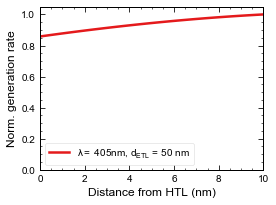

In [8]:
dETL = 50 # nm
# get list of layer names and thicknesses
layer_names = ['Air']+[x['name'] for x in layers_CBP_TPBi]
doping = [1]+[x['doping'] for x in layers_CBP_TPBi]
d_list = [0]+[x['d'] for x in layers_CBP_TPBi]
active_layer_i = layer_names.index(active_layer_CBP)
# Set thickness of ETL (which is TPBi in this case)
d_list[layer_names.index('TPBi')] = dETL

# Calculate generation profile
n_list = tmm.load_nk(layer_names,doping,pump_wavelength,df_nk)
coh_tmm_data = tmm.coherent_tmm('s',n_list, d_list, theta0*degree, pump_wavelength)
position = dipole_positions * d_list[active_layer_i]
position_full = tmm.position_resolved(active_layer_i,position,coh_tmm_data,
                                      powerDensity=powerDensity)
G_ex_CBP_TPBi = position_full['G']

# Plot E-field profile
fig,ax=plt.subplots(figsize=(4,3))
plt.plot(position,G_ex_CBP_TPBi/np.amax(G_ex_CBP_TPBi),
         label='$\lambda=$ ' +str(pump_wavelength) + 'nm, ' 
               + 'd$_{ETL}$ = ' + str(dETL) + ' nm')
plt.axis([0,d_list[active_layer_i],0,1.05])
legend = plt.legend(loc=0)
plt.xlabel('Distance from HTL (nm)')
plt.ylabel('Norm. generation rate')
plt.show()

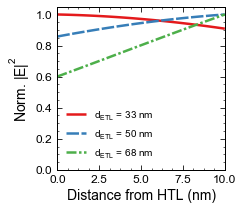

In [9]:
# Plot generation for different ETL thicknesses
dETLs = [33,50,68] # nm
fig,ax=plt.subplots(figsize=(3,3))
for i,dETL in enumerate(dETLs):
    d_list[-3] = dETL
    n_list = tmm.load_nk(layer_names,doping,pump_wavelength,df_nk)
    coh_tmm_data = tmm.coherent_tmm('s',n_list, d_list, 
                                    theta0*degree, pump_wavelength)
    position = dipole_positions * d_list[active_layer_i]
    position_full = tmm.position_resolved(active_layer_i,position,
                                          coh_tmm_data,
                                          powerDensity=powerDensity)
    G_ex = position_full['G']
    plt.plot(position,G_ex/np.amax(G_ex),
             label='d$_{ETL}$ = ' + str(dETL) + ' nm',
             linestyle=styles[i])

plt.axis([0,d_list[active_layer_i],0,1.05])
legend = plt.legend(loc=0,frameon=False)
format_axis(ax,xlabel='Distance from HTL (nm)',
           ylabel='Norm. $|E|^2$',fs_tick=fs_tick,fs_label=fs_label)
#plt.savefig(os.path.join('Plots','E-field-vs-dETL_CBP-Irppy.svg'), dpi=200, bbox_inches='tight',transparent=True)

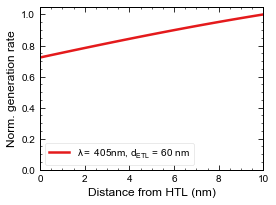

In [10]:
# Optical generation for the heated TPBi:Ir(ppy)3 devices
dETL = 60 # nm
# get list of layer names and thicknesses
layer_names = ['Air']+[x['name'] for x in layers_TPBi_heated]
doping = [1]+[x['doping'] for x in layers_TPBi_heated]
d_list = [0]+[x['d'] for x in layers_TPBi_heated]
active_layer_i = layer_names.index(active_layer_heated)
# Set thickness of ETL (which is TPBi in this case)
d_list[layer_names.index('TPBi')] = dETL

# Calculate generation profile
n_list = tmm.load_nk(layer_names,doping,pump_wavelength,df_nk)
coh_tmm_data = tmm.coherent_tmm('s',n_list, d_list, theta0*degree, pump_wavelength)
position = dipole_positions * d_list[active_layer_i]
position_full = tmm.position_resolved(active_layer_i,position,coh_tmm_data,
                                      powerDensity=powerDensity)
G_ex_TPBi_heated = position_full['G']

# Plot E-field profile
fig,ax=plt.subplots(figsize=(4,3))
plt.plot(position,G_ex_TPBi_heated/np.amax(G_ex_TPBi_heated),
         label='$\lambda=$ ' +str(pump_wavelength) + 'nm, ' 
               + 'd$_{ETL}$ = ' + str(dETL) + ' nm')
plt.axis([0,d_list[active_layer_i],0,1.05])
legend = plt.legend(loc=0)
plt.xlabel('Distance from HTL (nm)')
plt.ylabel('Norm. generation rate')
plt.show()

## Outcoupling of CBP:Ir(ppy)3 device
Calculate $\eta_{OC}(x)$, $\tau(x)$, and $k_r(x)$.

In [11]:
import warnings
warnings.filterwarnings("ignore")
from oledpy.dipole_emission import ThinFilmArchitecture

In [12]:
# Define wavelengths of interest
wavelengths = np.arange(450,650,5)
PL = np.genfromtxt('Reference Data/Irppy3.pl',skip_header=5,delimiter='\t')
PL_interp = np.interp(wavelengths,PL[:,0],PL[:,1])/wavelengths
arch_CBP_TPBi = ThinFilmArchitecture(
    layer_dict_list = layers_CBP_TPBi,
    dipole_positions = dipole_positions,
    vac_wavelengths=wavelengths,pl_spectrum=PL_interp,
    tau=1.3e-6,PLQY=0.92)
# Parameters for the emitter outside of a device cavity:
# tau is the intrinsic exciton lifetime of dilute Ir(ppy)3
# PLQY is the photoluminescence quantum yield of dilute Ir(ppy)3
arch_CBP_TPBi.load_nk(df_nk=df_nk)
arch_CBP_TPBi.run_attribute_checks()

Active layer is: CBP-Irppy. 
 To change, call arch.set_active_layer(active_layer) Indexing starts at 0.
RZ not provided. Flat RZ will be assumed


If you want to evaluate multiple ETL thickness, see the functions `loop_over_single_layer_prop` and `summarize_loop_data` in oledpy.dipole_emission. Otherwise, as shown below, just use `summarize_device` to calculate all the spatial parameters.

In [13]:
arch_CBP_TPBi.show_wavelength_progress_bar=True
custom_u = np.hstack((np.arange(0,0.75,0.005),
                      np.arange(0.75,1,0.001),
                      np.arange(1+0.001,2,0.002),
                      np.arange(2,10,0.1)))#,np.arange(30,100,1)
arch_CBP_TPBi.init_pds_variables(custom_u=custom_u)
# un-comment to make sure ETL thickness is set properly:
# layer_idx=arch_CBP_TPBi.layer_names.index('TPBi')
# arch_CBP_TPBi.d[layer_idx] = 50 
arch_CBP_TPBi.summarize_device()
eta_out_of_x = arch_CBP_TPBi.wavelength_averaged_eta_out
kr_of_x = arch_CBP_TPBi.kr_effective_spatial
tau_of_x = arch_CBP_TPBi.tau_effective_spatial

Provided imaginary active layer index. Discarding imaginary part.


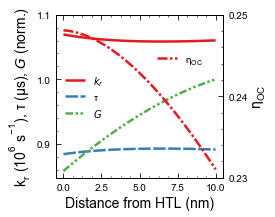

In [14]:
# Plot all spatial parameters
fig,ax=plt.subplots(figsize=(3,3))#,ncols=4)
ax_right = ax.twinx()
plot_fname = 'spatial-optical-parameters-CBP-Irppy3-dETL=50nm.svg'
arch = arch_CBP_TPBi
dEML = arch.d[arch.active_layer]
ax.plot(dipole_positions*dEML,kr_of_x/1e6,
        linestyle=styles[0],label='$\mathit{k_r}$')
ax.plot(dipole_positions*dEML,tau_of_x/1e-6,
        linestyle=styles[1],label=r'$\tau$')
ax_right.plot(dipole_positions*dEML,eta_out_of_x,
             linestyle=styles[2],label='$\eta_{OC}$')
ax.plot(dipole_positions*dEML,
           G_ex_CBP_TPBi/np.amax(G_ex_CBP_TPBi),linestyle=styles[3],
           label='$\mathit{G}$')
ax.legend(frameon=False)
plt.legend(loc='lower left',bbox_to_anchor=(0.55,0.625),frameon=False)
ax.set_ylabel(r'$k_r$ ($10^6$ s$^{-1}$), $\tau$ ($\mu$s), $\mathit{G}$ (norm.)')
ax.set_xlabel('Distance from HTL (nm)',fontsize=fs_label)
ax_right.set_ylabel('$\eta_{OC}$')
ax_right.set_yticks([0.23,0.24,0.25])
ax.set_yticks(np.arange(0.9,1.11,0.1))

# ax[3].set_ylabel('$G_{ex}$')
for subax in [ax,ax_right]:
    format_axis(subax)
    
#plt.savefig(os.path.join(plot_dir,plot_fname),bbox_inches='tight',transparent=True)

## TPBi:Ir(ppy)3 heated devices

In [15]:
# Define wavelengths of interest
wavelengths = np.arange(450,650,5)
PL = np.genfromtxt('Reference Data/Irppy3.pl',skip_header=5,delimiter='\t')
PL_interp = np.interp(wavelengths,PL[:,0],PL[:,1])/wavelengths
arch_heated = ThinFilmArchitecture(
    layer_dict_list = layers_TPBi_heated,
    dipole_positions = dipole_positions,
    vac_wavelengths=wavelengths,pl_spectrum=PL_interp,
    tau=1.3e-6,PLQY=0.92)
arch_heated.load_nk(df_nk=df_nk)
arch_heated.run_attribute_checks()

Active layer is: TPBi-Irppy. 
 To change, call arch.set_active_layer(active_layer) Indexing starts at 0.
RZ not provided. Flat RZ will be assumed


In [16]:
arch_heated.show_wavelength_progress_bar=True
custom_u = np.hstack((np.arange(0,0.75,0.005),
                      np.arange(0.75,1,0.001),
                      np.arange(1+0.001,2,0.002),
                      np.arange(2,10,0.1)))#,np.arange(30,100,1)
arch_heated.init_pds_variables(custom_u=custom_u)
# un-comment to make sure ETL thickness is set properly:
# layer_idx=arch_heated.layer_names.index('TPBi')
# arch_heated.d[layer_idx] = 50 
arch_heated.summarize_device()
eta_out_of_x_heated = arch_heated.wavelength_averaged_eta_out
kr_of_x_heated = arch_heated.kr_effective_spatial
tau_of_x_heated = arch_heated.tau_effective_spatial

Provided imaginary active layer index. Discarding imaginary part.


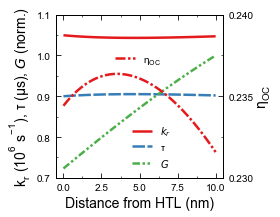

In [17]:
fig,ax=plt.subplots(figsize=(3,3))#,ncols=4)
ax_right = ax.twinx()
plot_fname = 'spatial-optical-parameters-heated-device.svg'
dEML = 10#arch_heated.d[arch_heated.active_layer]
ax.plot(dipole_positions*dEML,kr_of_x_heated/1e6,
        linestyle=styles[0],label='$\mathit{k_r}$')
ax.plot(dipole_positions*dEML,tau_of_x_heated/1e-6,
        linestyle=styles[1],label=r'$\tau$')
ax_right.plot(dipole_positions*dEML,eta_out_of_x_heated,
             linestyle=styles[2],label='$\eta_{OC}$')
ax.plot(dipole_positions*dEML,
        G_ex_TPBi_heated/np.amax(G_ex_TPBi_heated),
        linestyle=styles[3],label='$\mathit{G}$')
ax.legend(frameon=False,loc='lower left',bbox_to_anchor=(0.4,0))
plt.legend(loc='lower left',bbox_to_anchor=(0.3,0.625),frameon=False)
ax.set_ylabel(r'$k_r$ ($10^6$ s$^{-1}$), $\tau$ ($\mu$s), $\mathit{G}$ (norm.)')
ax.set_xlabel('Distance from HTL (nm)',fontsize=fs_label)
ax_right.set_ylabel('$\eta_{OC}$')
ax_right.set_yticks([0.23,0.235,0.24])
ax.set_yticks(np.arange(0.7,1.11,0.1))
for subax in [ax,ax_right]:
    mpl_helper.set_minor_ticks(subax)
    format_axis(subax)
    
#plt.savefig(os.path.join(plot_dir,plot_fname),bbox_inches='tight',transparent=True)

## $d_{ETL}$-dependent Optical generation in heated devices

The ETL thickness varied slightly from growth-to-growth for the heated deposition devices. Here, we simulate the optical generation for each ETL thickness to allow for accurate simulation of the temperature dependent quenching data. We neglect changes in the outcoupling parameters (exciton lifetime, radiative rate, and outcoupling efficiency) as the slight differences with thickness here have a very small effect on simulated quenching.

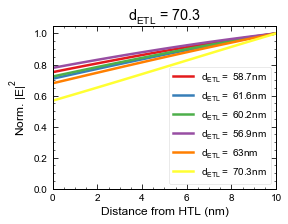

In [18]:
theta0 = 45
lam_vac = 405
degree=np.pi/180
layers = [ 'Air','SiO2', 'ITO' ,'PEDOT' ,'TCTA'  ,  'TPBi-Irppy' ,'TPBi', 'Al', 'Air']
doping = [ 1, 1  ,  1  ,  1    ,  1         ,[0.92,0.08]   ,  1,    1,   1]
d_list = np.array([0,0,   100 ,  70  ,  20 ,   10 ,   60  , 100, 0])
powerDensity = 5 #mW/cm2
# Measured ETL thickness for heated TPBi:Ir(ppy)3 devices
# 25, 47, 61, 72, 87, 107 C
dETLs_heated = [58.7,61.6,60.2,56.9,63,70.3]#np.arange(35,221,5)#[35,70,105,140,160]#np.arange(30,200,10)
layer = 5 # emissive layer
G_ex_list_heated = ['']*len(dETLs_heated)
fig,ax=plt.subplots(figsize=(4,3))
for i,dETL in enumerate(dETLs_heated):
    d_list[-3] = dETL
    n_list = tmm.load_nk(layers,doping,lam_vac,df_nk)
    coh_tmm_data = tmm.coherent_tmm('s',n_list, d_list, theta0*degree, lam_vac)
    position = np.arange(0,1.01,0.01) * d_list[layer]#np.arange(0,d_list[layer]+1,1)
    position_full = tmm.position_resolved(layer,position,coh_tmm_data,powerDensity=powerDensity)
    G_ex = position_full['G']
    G_ex_list_heated[i] = G_ex
    E = position_full['Esq']
    plt.plot(position,E/np.amax(E),label='$d_{ETL}=$ ' +str(dETL) + 'nm')
    #plt.plot(position,E)
plt.axis([0,d_list[layer],0,1.05])
legend = plt.legend(loc=0)#plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.xlabel('Distance from HTL (nm)')
plt.ylabel('Norm. $|E|^2$')
plt.title('d$_{ETL}$ = ' + str(dETL))
#mpl_helper.set_minor_ticks(ax)
#fname = 'dETL' + str(dETL) + '_' +str(d_list[layer]) + '_Efield_405-and-473nm.png'
#plt.savefig(os.path.join('Plots',fname), dpi=200, bbox_inches='tight')
plt.show()

In [19]:
# Save files
data_fname = 'Reference Data/optical-simulation-data.csv'
header=('Relative position in EML,Generation CBP:Irppy,kr CBP:Irppy (s^-1),'
       +'tau CBP:Irppy (s),eta_out CBP:Irppy,Generation TPBi:Irppy,'
       +'kr TPBi:Irppy (s^-1),tau TPBi:Irppy (s),eta_out TPBi:Irppy')
data = np.vstack((dipole_positions,G_ex_CBP_TPBi,kr_of_x,
                 tau_of_x,eta_out_of_x,G_ex_TPBi_heated,
                 kr_of_x_heated,tau_of_x_heated,
                  eta_out_of_x_heated)).T
np.savetxt(data_fname,data,header=header,delimiter=',')
# Save file for dETL dependence of optical generation in heated devices
header = ','.join('dETL = ' + str(x)+ ' nm' for x in dETLs_heated)
np.savetxt('Reference Data/dETL-variation-heated-devices.csv',
          np.array(G_ex_list_heated).T,header=header,delimiter=',')

# Feasible parameter regions

In [20]:
i=0
tau = tau_of_x # seconds
G = G_ex_CBP_TPBi
sigma_P = 1.6e12 # cm^-2
# Set the emissive layer thickness:
dEML = 10 # nm #arch_CBP_TPBi.d[arch_CBP_TPBi.active_layer]
x = dipole_positions * dEML
L_list = 10**(np.linspace(-1,1,70))#np.array([0.1,0.15,0.25,0.5,0.75,1,1.5,2,2.5,3,4,5,6,7,8,9,10])#np.arange(0.1,10,0.1)
k_list = 10**(np.linspace(np.log10(3e-14),np.log10(3e-12),70))# cm^-3 s^-1
# These D values (nm^2/s) correspond to the following Ld values (nm)
# 1.4e6 - ~1 nm, 2.15e7 ~ 4 nm, 1e8 ~9 nm
D_list = [1.4e6,2.15e7,1e8]#[0,1.4e6,0.6e7,2e7,1e8] #nm^2/s
PL_norm = np.zeros((len(D_list),len(L_list),len(k_list)))
IQE = np.zeros((len(D_list),len(L_list),len(k_list)))
EQE = np.zeros((len(D_list),len(L_list),len(k_list)))
for D_idx,D in enumerate(D_list):
    for L_idx,L in enumerate(L_list):
        n_pol = calc_npol_exp(x,dEML,sigma_P,L)
        for k_idx,k_TP in enumerate(k_list):
            PL_norm[D_idx,L_idx,k_idx]=calc_normPL(dEML,n_pol,tau,G,D,k_TP,
                                                   eta_out_of_x,kr_of_x)
            #IQE[D_idx,L_idx,k_idx]    =calc_IQE(dEML,n_pol,tau,n_pol,D,k_TP,kr)
            EQE[D_idx,L_idx,k_idx]    =calc_EQE(dEML,n_pol,tau,n_pol,D,k_TP,
                                               eta_out_of_x,kr_of_x)

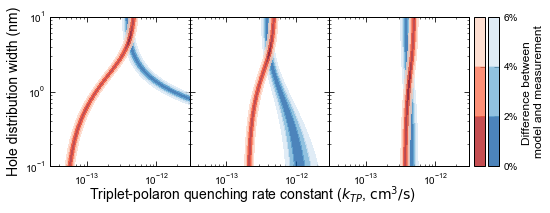

In [21]:
# EL and PL model - measured 2d plot
targetPL = 0.65
targetEL = 0.63 # = IQE/eta_PL = ~0.6 / ~0.95
targetEQE = 0.134
fig,axs=plt.subplots(figsize=(2.5*len(D_list),2.75),ncols=len(D_list))
plt.subplots_adjust(wspace=0)
logy=True
for D_idx,D in enumerate(D_list):
    ax=axs[D_idx]
    levs = np.arange(0,0.061,0.02)
    csPL = ax.contourf(k_list,L_list,
                      np.abs(PL_norm[D_idx,:,:]-targetPL)/targetPL,
                      levs,alpha=0.75,#norm=colors.LogNorm(),
                      cmap=plt.get_cmap('Blues_r'))
    csEL = ax.contourf(k_list,L_list,
                      np.abs(EQE[D_idx,:,:]-targetEQE)/targetEQE,
                      levs,alpha=0.75,#norm=colors.LogNorm(),
                      cmap=plt.get_cmap('Reds_r'))
    if D_idx==(len(D_list)-1):
        # Find position of last contour plot and use this to set position of new
        # colorbar axes.    
        left, bottom, width, height = axs[-1].get_position().bounds
        cax1 = fig.add_axes([left+width+width*0.1+0.01, bottom, width*0.075, height])
        cax2 = fig.add_axes([left+width+0.01, bottom, width*0.075, height])
        ticks = levs#np.arange(0,0.101,0.01)
        cbar1 = plt.colorbar(csPL,ticks=ticks, cax=cax1)
        cbar2 = plt.colorbar(csEL,ticks=ticks, cax=cax2)
        cbar2.ax.set_yticklabels([])
        for c in [cbar1,cbar2]:
            c.ax.minorticks_off()
        cbar1.ax.set_yticklabels(['{:.0f}'.format(x*100)+'%' for x in ticks])
        cbar1.set_label('Difference between \nmodel and measurement')#'|Model - Measured|/Measured')
    ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    else:
        ax.set_yticks(np.arange(0,10.1,2))

    mpl_helper.setNiceTicks(ax,logx=True,logy=logy)
    if D_idx == 0:
        format_axis(ax,#xlabel='$k_{TP}$ (cm$^{3}$ s$^{-1}$)',
                    ylabel='Hole distribution width (nm)')#'$\mathit{n_{h}}$ decay length (nm)')
    else:
        format_axis(ax)#,xlabel='$k_{TP}$ (cm$^{3}$ s$^{-1}$)')
        ax.yaxis.set_ticklabels([])
fig.text(0.5, -0.02, 'Triplet-polaron quenching rate constant '
                     + '($\mathit{k_{TP}}$, $\mathrm{cm^3/s}$)', 
         ha='center', va='center',fontsize=fs_label)
# plt.savefig(os.path.join(plot_dir,'PL-IQE_overlay_2D_vary-ktp-and-L-and-D.svg'),
#                dpi=300,bbox_inches='tight',transparent=True)
plt.show()

PLnorm = 0.62 , IQE = 0.51, EQE = 0.127
Avg. Ld = 3.44 nm (with quenching)
Avg. Ld = 4.21 nm (without quenching)


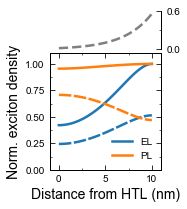

In [22]:
# Plot combined EL and PL solution, short Ld
fig,axs=plt.subplots(figsize=(2,3),nrows=2,sharex=True,
                    gridspec_kw={
                           'height_ratios': [1, 2.5]})
plt.subplots_adjust(hspace=0)
ax,ax2=axs[1],axs[0]
i=0
D =2e7# 1e8
L=3#1.25#2.5
tau = tau_of_x[i] # seconds
k_TP = 4.9e-13 # cm^-3 s^-1
sigma_P = 1.6e12 # cm^-2
dEML = 10 # nm, arch_TPBi.d[arch_TPBi.active_layer]
x = dipole_positions * dEML
n_pol = calc_npol_exp(x,dEML,sigma_P,L)
tau_eff = 1 / (1/tau + k_TP * n_pol)
G_opt = G_ex_CBP_TPBi
G_el = n_pol
# optically generated
n_ex_opt_quenched  = CenterFDsolver(D,tau_eff,G_opt,dEML,BCs=('hn','hn'))
n_ex_opt_unquenched = CenterFDsolver(D,tau,G_opt,dEML,BCs=('hn','hn'))
opt_unquenched = eta_out_of_x[i] * kr_of_x[i] * n_ex_opt_unquenched
opt_quenched = eta_out_of_x[i] * kr_of_x[i] * n_ex_opt_quenched
# Electrically generated
n_ex_el_quenched  = CenterFDsolver(D,tau_eff,G_el,dEML,BCs=('hn','hn'))
n_ex_el_unquenched = CenterFDsolver(D,tau,G_el,dEML,BCs=('hn','hn'))
el_unquenched = eta_out_of_x[i] * kr_of_x[i] * n_ex_el_unquenched
el_quenched = eta_out_of_x[i] * kr_of_x[i] * n_ex_el_quenched
# Plots
ax.plot(x,n_ex_el_quenched/np.amax(n_ex_el_unquenched),
       color='tab:blue',linestyle=styles[0+1])#,label='EL,quenched')
ax.plot(x,n_ex_el_unquenched/np.amax(n_ex_el_unquenched),label='EL',
        color='tab:blue')

ax.plot(x,n_ex_opt_quenched/np.amax(n_ex_opt_unquenched),
        color='tab:orange',linestyle=styles[0+1])#,label='PL,quenched')
ax.plot(x,n_ex_opt_unquenched/np.amax(n_ex_opt_unquenched),label='PL',
        color='tab:orange')



ax2.plot(x,n_pol/1e19,'--',color=tuple(3*[0.5]))
y_upper = np.amax(n_pol)/1e19
y_upper = float('{:.1f}'.format(y_upper))
side = 'right'
mpl_helper.minimal_axis_spines(ax2,spinecolor='k',visible=[side],
                               tick_loc=('none',side),bounds=[[0,y_upper]])
ax2.set_yticks([0,y_upper])
for subax in axs:
    mpl_helper.set_minor_ticks(subax)
format_axis(ax,limits = [-1,11,0,1.1],
            xlabel='Distance from HTL (nm)',
            ylabel='Norm. exciton density')#$\mathit{n_{T}}$')
#format_axis(ax2,ylabel='$\mathit{n_{h}}$ ($10^{19}\, cm^{-3}$)')
ax2.set_ylim(-0.1*y_upper,y_upper*1.1)
if side == 'left':
    ax2.spines[side].set_position(('data', -1))
    #ax2.yaxis.set_label_coords(1.35, 0.5)
else:
    ax2.spines[side].set_position(('data', 11))
    ax2.yaxis.set_label_coords(1.35, 0.2)
#ax2.set_title('$k_{TP} = $' + num2latex(k_TP,digits=1) + '$ cm^{3} s^{-1}$'
#              + '\nD = '+ num2latex(D,digits=1)+ '$ nm^{2} s^{-1}$')
plt.legend(frameon=False)
PL_quench_ratio = np.trapz(opt_quenched)/np.trapz(opt_unquenched)
EL_quench_ratio = np.trapz(el_quenched)/np.trapz(el_unquenched)
print('PLnorm = ' + '{:.2f}'.format(PL_quench_ratio)
     + ' , IQE = '+ '{:.2f}'.format(np.trapz(n_ex_el_quenched*kr_of_x[i])
                                    /np.trapz(n_ex_el_quenched/tau_eff))
     + ', EQE = '+ '{:.3f}'.format(np.trapz(el_quenched)/np.trapz(n_ex_el_quenched/tau_eff)))

# # '$n_{ex}$, D = ' + '{:.1e}'.format(D) + ' nm$^2$/s'
# #plt.plot(x,n_ex/1e14,'--',label='$n_{ex}$, $L_D = $' + '{:.0f}'.format(avg_Ld) + ' nm')

# label='$L_D = $' + '{:.1f}'.format(avg_Ld) + ' nm'
avg_Ld = np.trapz(np.sqrt(D*tau_eff)*n_ex_opt_quenched/np.trapz(n_ex_opt_quenched))
print('Avg. Ld = ' + '{:.2f}'.format(avg_Ld) + ' nm (with quenching)')
avg_Ld = np.trapz(np.sqrt(D*tau)*n_ex_opt_unquenched/np.trapz(n_ex_opt_unquenched))
print('Avg. Ld = ' + '{:.2f}'.format(avg_Ld) + ' nm (without quenching)')
# plt.savefig(os.path.join(
#     plot_dir,'profiles_matchEQE-and-PL_expRZ-L='+str(L)+'nm_D='+'{:.1e}'.format(D)+'nm2s_'
#     + 'Ld=' +'{:.2f}'.format(avg_Ld)+'nm_ktp='+str(k_TP)+'.svg'),
#             dpi=300,bbox_inches='tight',transparent=True)

# Temperature data

In these heated devices (TCTA/TPBi:Ir(ppy)3/TPBi), the host (TPBi) is polar, so we assume hole density decays exponentially from the HTL/EML interface.

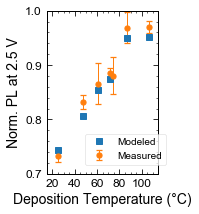

In [23]:
# Extracted hole density for different temperatures
capsize = 3
capthick = 1.0
error_lw = 1.0
mew = 1.25
fig,ax=plt.subplots(figsize=(2,3))
temp_list = np.array([ 25,  47,  61,  72,  87, 107])
# Measured sheet charge density from displacement current
# See Fig. 4 from publication
sigma_P_list = np.array([1.63801528e+12, 1.13493431e+12, 7.96914033e+11, 
                         6.58907633e+11,2.43126575e+11, 2.33372157e+11])
PL_quench_ratios = []
D = 2e7
L=4 # nm
dEML = 10 # nm, arch_TPBi_heated.d[arch_TPBi_heated.active_layer]
x = dipole_positions * dEML
k_TP = 2.5e-13 # cm^-3 s^-1
for idx_T,sigma_P in enumerate(sigma_P_list):
    tau = tau_of_x_heated # seconds
    # Here, we assume polaron density decayse from the 
    # HTL/EML interface:
    n_pol = calc_npol_exp_HTL(x,dEML,sigma_P,L)
    tau_eff = 1 / (1/tau + k_TP * n_pol)
    G_opt = G_ex_list_heated[idx_T]
    G_el = n_pol
    PL_quench_ratios.append(
        calc_normPL(dEML,n_pol,tau,G_opt,D,k_TP,
                    eta_out_of_x_heated,kr_of_x_heated))
    
# Measured PL quenching at ~2.5V, see Fig. 4 from the publication
plt.errorbar(
    [25,47,61,72,74,87,107],
    [0.733, 0.832, 0.866, 0.885, 0.88, 0.969, 0.97],
    yerr = np.array([0.011, 0.0125, 0.0385, 0.0103, 0.0340,0.028, 0.0116]),
    capsize=capsize,capthick=capthick,linewidth=error_lw,fmt='o',
    markersize=ms-2,markeredgewidth=mew,
    color='tab:orange',mfc='tab:orange',
    label='Measured'
)
# Modeled PL quenching:
plt.plot(temp_list,PL_quench_ratios,'s',
         color='tab:blue',label='Modeled')

# Format plot
plt.legend(loc='lower left',bbox_to_anchor=(0.3,0.025))
ax.set_xticks(np.arange(20,101,20))
format_axis(ax,limits=[15,115,0.7,1],
            xlabel="Deposition Temperature (°C)",
            ylabel="Norm. PL at 2.5 V",
            fs_label=fs_label,fs_tick=fs_tick)
ax.spines['left'].set_position(('data', 15))
ax.spines['bottom'].set_position(('data', 0.7))
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')
# plt.savefig(os.path.join(plot_dir,'heated_model-vs-meas_expRZ-L='+str(L)
#                          +'nm_varyLd_ktp='+str(k_TP)+'_D='+str(D)+'nm2s.svg'),
#                     dpi=300,bbox_inches='tight',transparent=True)